### Solving simple ODEs using Euler's method

Euler's methods is the simplest numerical technique to calculate the solution of a differential equation. The Euler methods evaluates the rate of change at time t to calculate the next value of the state variable. 

Consider an exponentialy growing population with differential equation:  
$$ {dN \over dt} = {r N(t) } $$
with $N$ the number of indivuduals and r the rate of growth.

Using the Euler method, we can write that the number of individuals at some time $(t+\delta t)$ is:

$$ {N(t+\delta t)} = {N(t)+r N(t) \delta t} $$  
or at $(t+2\delta t)$
$$ {N(t+2\delta t)} = {N(t+\delta t)+r N(t+\delta t) \delta t} $$  

After each time step, $\delta t$, we simply add the number of individuals to the population that were born in the interval $\delta t$.

#### Let's start coding

First import the required packages. Let's import the package numpy as np (https://numpy.org/doc/stable/reference/), and package matplotlib.pyplot as plt. Matplotlib is a package to create visualizations in Python.

If a  package is not avaialable use the pip install 'package name' command.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt  #pip install matplotlib

#Optional
plt.rcParams["figure.figsize"] = (5,5) #change size of plots, values might need to be changed depending on your screen size 
                                       #https://towardsdatascience.com/change-figure-size-matplotlib-11a409f39584
plt.rcParams['figure.dpi'] = 100 #change resolution, dopts per inch


Now define the initial parameters for exponential growth:
$N0=1$, $r=ln(2)$




In [2]:
N0 = 1
r = np.log(2) #doubling per 1 unit change in time, np.log(x) calculate natural log of x

We're now ready to build the integrator.  

The integrator simply consists of a for loop that each loop adds the change in population that occured in $\delta t$ to the last known value of N in the storage vector (N_list). Thereafter the storage vector is updated with the new value.

In [3]:
dt=0.0001
time_end=5
steps=int(time_end/dt)

time_start=0
N_list=[(N0,time_start)] #storage list: This list keeps track of N and time.

for n in range(steps): #iterate over list with length 'steps'.

    N_current=N_list[-1][0] #grab current value of N
    N_t_1=N_current+r*N_current*dt #calculate next value of N, N_t_1
    
    time=N_list[-1][1]+dt #calculate time of N_t_1
    
    N_list.append((N_t_1,time)) #append N_t_1 and time to storage list N_list
    

In [5]:
#If you want to re-use a specific piece of code, you can put it in a function. To use the code then you just have to call the function
def Euler_exponentialgrowth(dt,time_end,N0,r):

    steps=int(time_end/dt)

    time_start=0
    N_list=[(N0,time_start)] #storage list: This list keeps track of N and time.

    for n in range(steps): #iterate over list with length 'steps'.

        N_current=N_list[-1][0] #grab current value of N
        N_t_1=N_current+r*N_current*dt #calculate next value of N, N_t_1

        time=N_list[-1][1]+dt #calculate time of N_t_1

        N_list.append((N_t_1,time)) #append N_t_1 and time to storage list N_list

    return N_list #return the output list
     
N_list = Euler_exponentialgrowth(dt=0.0001,time_end=5,N0=1,r=np.log(2))

Let's plot the population N versus time using plt.plot() (https://matplotlib.org/stable/tutorials/introductory/pyplot.html)

You can unpack the output array, N, using array.T with array being the output array. To unpack N, we first have to convert it to a numpy array using np.array(N). (https://numpy.org/doc/stable/reference/generated/numpy.ndarray.T.html#numpy.ndarray.T)



In [6]:
N,time=np.array(N_list).T
time

array([0.0000e+00, 1.0000e-04, 2.0000e-04, ..., 4.9998e+00, 4.9999e+00,
       5.0000e+00])

In [7]:
list(N)[0:10]

[1.0,
 1.000069314718056,
 1.000138634240642,
 1.0002079585680912,
 1.0002772877007367,
 1.0003466216389114,
 1.0004159603829486,
 1.0004853039331811,
 1.0005546522899424,
 1.0006240054535656]

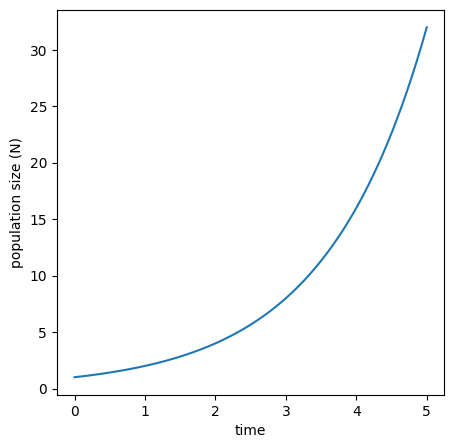

In [8]:
plt.plot(time,N)
plt.xlabel('time')
plt.ylabel('population size (N)')
plt.show()


When performing a Euler integration, the chosen length of $\delta t $ is crucial to the succes of the method. If $\delta t $ is too large compared to the growth rate, the euler method will fail. Let's explore this by testing different $\delta t$ values.  

To do this, we will loop through a list of different $\delta t $ values, and each time run the Euler method and plot its results.

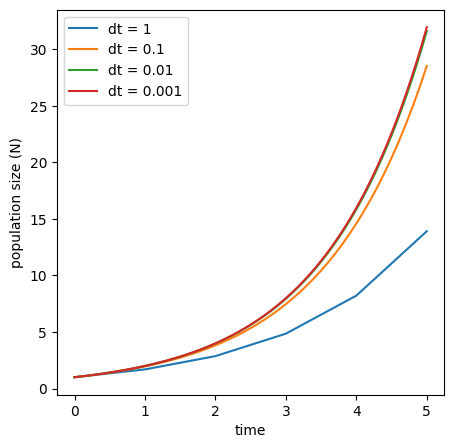

In [9]:

dt_list=[1,
         0.1,
         0.01,
         0.001]



for dt_test in dt_list:
    N_list = Euler_exponentialgrowth(dt=dt_test,time_end=5,N0=1,r=np.log(2))
    
    N,time=np.array(N_list).T
    
    plt.plot(time,N,label='dt = '+ str(dt_test))


plt.xlabel('time')
plt.ylabel('population size (N)')
plt.legend()
plt.show()

### Solving ODEs using Scipy's ODEINT integrator

Although the choice of $\delta t $ is really important to the accuracy of the numerical solution of ODEs, you cannot a priori know which $\delta t $ to use if there is no analytical solution of the ODEs. Luckily different solvers are available to mediate these issues. 

In the python package, SciPy, there are several built-in functions to solve ODEs. The most popular one is the scipy.intergrate.odeint function. https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

The odeint function requires four inputs:  

y=odeint(model,y0,t,args=parameters)  

1. model: Function consists of the ODEs of interest and returns it's derivatives.
2. y0: Starting values of the different states (list for systems with more ODEs)
3. t, a list of time points of which the solution will be reported. If you want a higher resolution, you can increase the number of points within the same timeframe.
4. parameters: a tuple (an ordered and immutable list, defined by tuple=() ) of parameters needed to solve the ODEs. If no paremeters are required, this arguments can be left out.
    
Let's now solve the exponential growth model using odeint and compare it to the Euler method.

First load the odeint function from the scipy.integrate package.

In [10]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from scipy.integrate import odeint #pip install scipy

Now we define the model function using the def keyword.

In [12]:
def model(N0,t,r):
    dNdt = r*N0
    return dNdt

Next, we define the initial values as with the Euler method. We also define the list, t, using np.linspace().  https://numpy.org/doc/stable/reference/generated/numpy.linspace.html

In [13]:
N0=1
r=np.log(2)

t=np.linspace(0,5,num=50)

In [14]:
t

array([0.        , 0.10204082, 0.20408163, 0.30612245, 0.40816327,
       0.51020408, 0.6122449 , 0.71428571, 0.81632653, 0.91836735,
       1.02040816, 1.12244898, 1.2244898 , 1.32653061, 1.42857143,
       1.53061224, 1.63265306, 1.73469388, 1.83673469, 1.93877551,
       2.04081633, 2.14285714, 2.24489796, 2.34693878, 2.44897959,
       2.55102041, 2.65306122, 2.75510204, 2.85714286, 2.95918367,
       3.06122449, 3.16326531, 3.26530612, 3.36734694, 3.46938776,
       3.57142857, 3.67346939, 3.7755102 , 3.87755102, 3.97959184,
       4.08163265, 4.18367347, 4.28571429, 4.3877551 , 4.48979592,
       4.59183673, 4.69387755, 4.79591837, 4.89795918, 5.        ])

Solve ODEs using odeint. Hint: You parameter tuple only contains on item and should include a comma. E.g. parameters=(parameter1,) (dont know why...)

In [15]:
y_odeint = odeint(model,N0,t,args=(r,))

In [16]:
y_odeint

array([[ 1.        ],
       [ 1.07329064],
       [ 1.15195281],
       [ 1.23638018],
       [ 1.32699531],
       [ 1.42425165],
       [ 1.52863598],
       [ 1.64067071],
       [ 1.76091654],
       [ 1.88997526],
       [ 2.0284928 ],
       [ 2.17716243],
       [ 2.33672805],
       [ 2.50798834],
       [ 2.69180046],
       [ 2.88908427],
       [ 3.10082714],
       [ 3.32808878],
       [ 3.57200658],
       [ 3.83380127],
       [ 4.11478307],
       [ 4.4163582 ],
       [ 4.74003598],
       [ 5.08743632],
       [ 5.46029785],
       [ 5.86048663],
       [ 6.2900055 ],
       [ 6.7510041 ],
       [ 7.24578958],
       [ 7.77683822],
       [ 8.34680777],
       [ 8.95855075],
       [ 9.61512877],
       [10.31982783],
       [11.07617473],
       [11.8879548 ],
       [12.75923075],
       [13.69436309],
       [14.69803189],
       [15.77526026],
       [16.93143937],
       [18.17235562],
       [19.50421941],
       [20.93369638],
       [22.46794066],
       [24

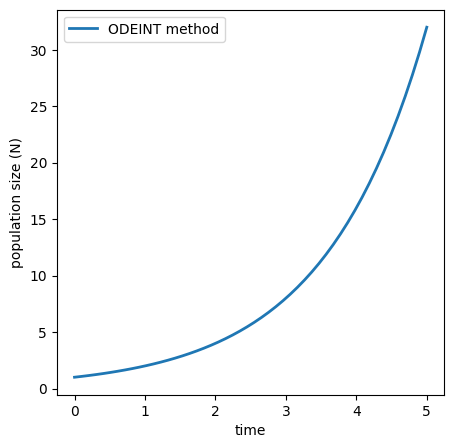

In [17]:
plt.plot(t,y_odeint,label='ODEINT method',linewidth=2.0) #plot odeint results
plt.xlabel('time')
plt.ylabel('population size (N)')
plt.legend()

Let's now rerun the previous Euler methods and plot the odeint and Euler solutions together. How do both methods compare?

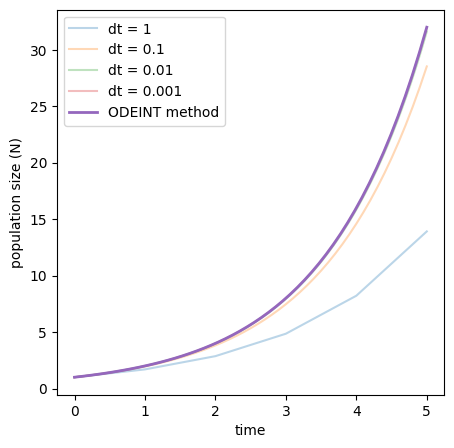

In [18]:
dt_list=[1,
         0.1,
         0.01,
         0.001]


for dt_test in dt_list:
    N_list = Euler_exponentialgrowth(dt=dt_test,time_end=5,N0=1,r=np.log(2))
    N,time=np.array(N_list).T
    
    plt.plot(time,N,label='dt = '+ str(dt_test),alpha=0.3)


    
plt.plot(t,y_odeint,label='ODEINT method',linewidth=2.0) #plot odeint results


plt.ylabel('population size (N)')
plt.xlabel('time')
plt.legend()
plt.show()